In [1]:
# from data_utils import split_data_to_traj_and_control
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import TensorDataset

In [2]:
train_mat_path = "./matlab/sdreDataset.mat"
val_mat_path = "./matlab/sdreVal.mat"

train = scipy.io.loadmat(train_mat_path)["dataset"]
val = scipy.io.loadmat(val_mat_path)["sdreVal"]

In [3]:
train.shape, val.shape

((20200, 3, 3), (10100, 3, 3))

In [4]:
def mat2tracks(mat, LEN_TRACK=101, reshape=False):
    # if reshape=False: cur_track.shape = (101, 3, 3) 
    #   cur_track[i, :, :] = [x11 x12 u1
    #                         x21 x22 u2
    #                         x31 x32 u3]
    # if reshape=True: cur_track.shape = (101, 1, 9)
    #   cur_track[i, :, :] = [x11 x21 x31 x12 x22 x32 u1 u2 u3]
    N_TRACKS = int(mat.shape[0] / LEN_TRACK)
    tracks = []
    for track_index in range(N_TRACKS):
        cur_track = mat[track_index*LEN_TRACK : (track_index+1)*LEN_TRACK]
        if reshape:
            cur_track = cur_track.transpose(0, 2, 1).reshape(-1, 9)
        tracks.append(cur_track)
    return tracks

In [5]:
train_tracks = mat2tracks(train)
val_tracks = mat2tracks(val)

In [6]:
sample_track = train_tracks[0]
sample_track.shape

(101, 3, 3)

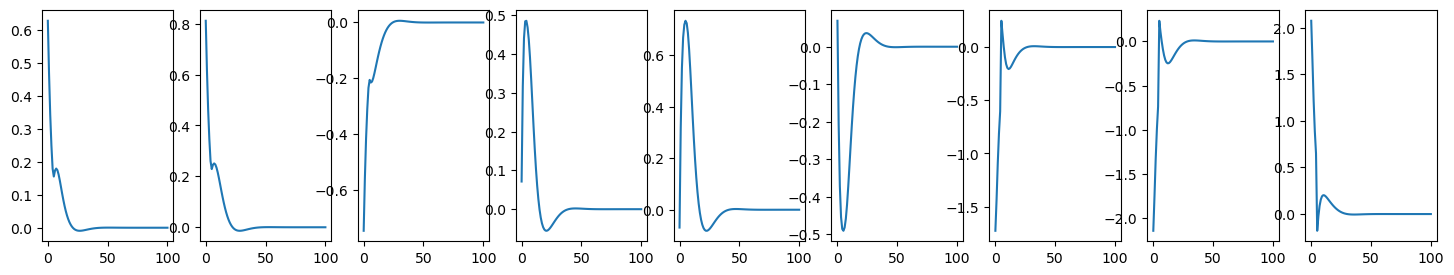

In [7]:
n = 1

plt.figure(figsize=(18, 3))
for i in range(3):
    for j in range(3):
        signal = sample_track[:, j, i]
        plt.subplot(1, 9, n)
        plt.plot(signal)
        n += 1

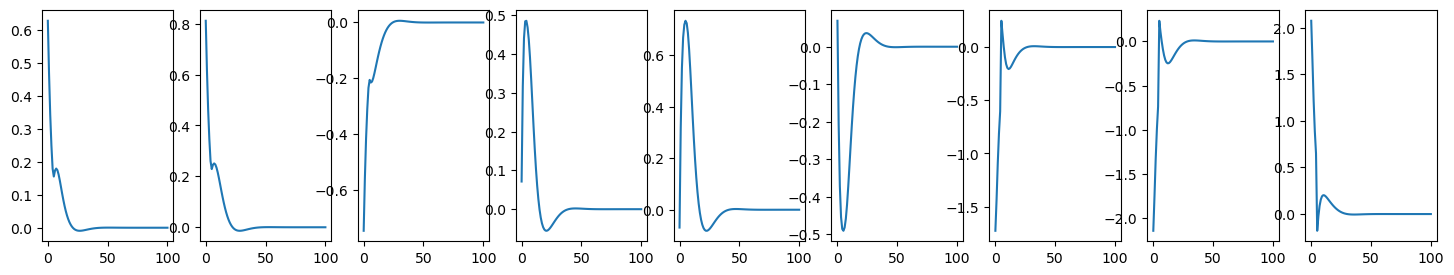

In [8]:
# reshaped_track = sample_track.transpose(0, 2, 1).reshape(-1, 9)
# reshaped_track.shape
reshaped_track = reshaped_train_tracks = mat2tracks(train, reshape=True)[0]

plt.figure(figsize=(18, 3))
for n in range(9):
    signal = reshaped_track[:, n]
    plt.subplot(1, 9, n+1)
    plt.plot(signal)
    n += 1


In [9]:
reshape = True

train_tracks = mat2tracks(train, reshape=reshape)
val_tracks = mat2tracks(val, reshape=reshape)

In [10]:
train_tracks = np.vstack(train_tracks) 
val_tracks = np.vstack(val_tracks)

train_tracks.shape, val_tracks.shape

((20200, 9), (10100, 9))

In [11]:
def split_data_to_traj_and_control(data):
    X = data[:, 0:6]
    y = data[:, 6:]
    X = torch.Tensor(X)
    y = torch.Tensor(y)
    dataset = TensorDataset(X, y)
    return dataset

In [12]:
dataset = split_data_to_traj_and_control(train_tracks)

In [13]:
dataset[0]

(tensor([ 0.6294,  0.8116, -0.7460,  0.0712, -0.0691,  0.0691]),
 tensor([-1.7260, -2.1447,  2.0740]))

In [16]:
X, y = dataset[0]

In [150]:
# a = np.arange(1, 10).reshape(3, 3)

# print(a)
# print(a.transpose(1, 0).reshape(-1, 9))